# Netflix Movie Duration Analysis (1990s)

This notebook analyzes movie durations from Netflix in the 1990s. It includes:
- Finding the most frequent movie duration.
- Creating a histogram of durations.
- Counting the number of short action movies (≤90 min).


In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


## Load and Filter Data

We read the Netflix dataset and filter movies released between 1990 and 1999.


In [6]:
# Read Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Filter movies released in the 1990s
filtered_movie_release = netflix_df[
    (netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)
]
filtered_movie_release.loc[:, 'duration'] = filtered_movie_release['duration'].str.extract(r'(\d+)')
filtered_movie_release.loc[:, 'duration'] = pd.to_numeric(filtered_movie_release['duration'], errors='coerce')


## Most Frequent Movie Duration

We determine the most common movie duration in the 1990s.


In [3]:
# Get list of movie durations
durations = filtered_movie_release['duration'].dropna().tolist()

# Find the most frequent duration
duration = Counter(durations).most_common(1)[0][0]
print(f'most frequent movie duration in the 1990s : {duration}')


most frequent movie duration in the 1990s : 1


## Histogram of Movie Durations

We visualize the distribution of movie durations in the 1990s using a histogram.


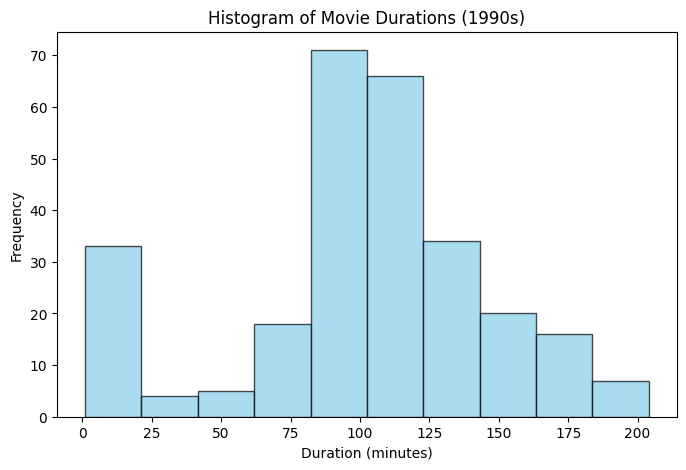

In [4]:
# Plot histogram of durations
plt.figure(figsize=(8, 5))
plt.title('Histogram of Movie Durations (1990s)')
plt.hist(durations, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


## Count of Short Action Movies

We count the number of action movies that have a duration of 90 minutes or less.


In [5]:
# Filter action movies
filtered_movie_genre = filtered_movie_release[
    filtered_movie_release['listed_in'].str.contains('Action', na=False)
]

# Count short action movies
short_movie_count = sum(filtered_movie_genre['duration'] <= 90)
print(f'Number of short action movies from the 1990s: {short_movie_count}')


Number of short action movies from the 1990s: 12
